In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from scipy import stats 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [229]:
train = pd.read_csv(r"D:\data science\project kaggle\home-data-for-ml-course\train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [230]:
train.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [231]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

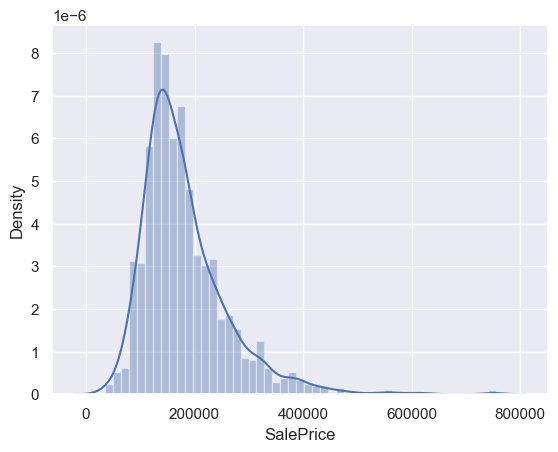

In [232]:
sns.distplot(train['SalePrice']);

In [233]:
print (f"skewness: {train['SalePrice'].skew()}")
print(f"kurtosis: {train['SalePrice'].kurt()}")

skewness: 1.8828757597682129
kurtosis: 6.536281860064529


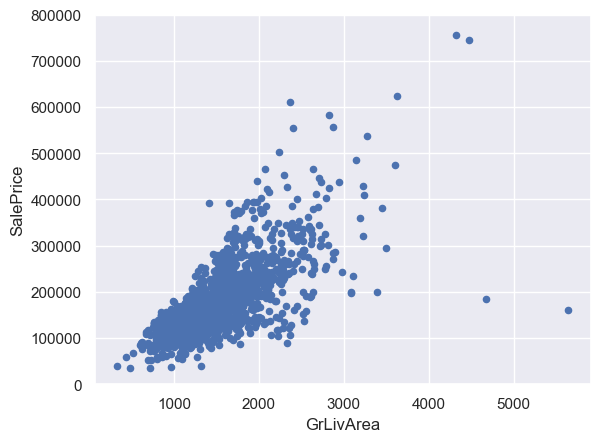

In [234]:
feature1 = 'GrLivArea'
data = pd.concat([train['SalePrice'],train[feature1]],axis=1)
data.plot.scatter(x=feature1, y='SalePrice',ylim=(0,800000));

linear relationship

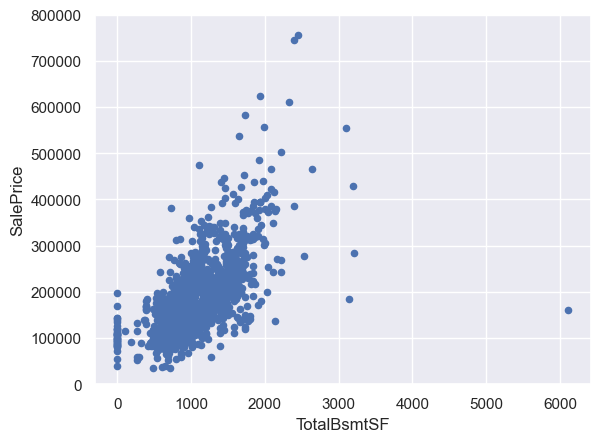

In [236]:
feature2 = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[feature2]],axis=1)
data.plot.scatter(x=feature2, y='SalePrice',ylim=(0,800000));

 ****linear relationship but changes  

# Relationship with categorical features# 

(-0.5, 9.5, 0.0, 800000.0)

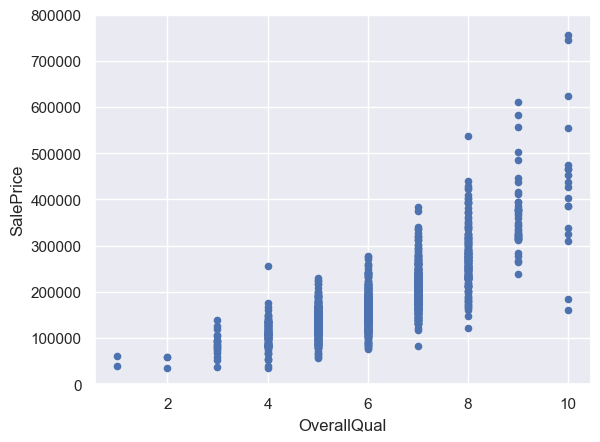

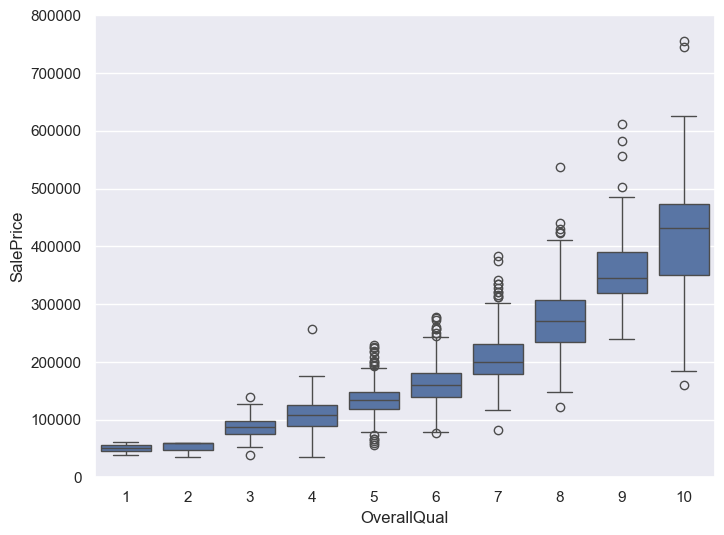

In [239]:
feature1 = 'OverallQual'
data = pd.concat([train['SalePrice'],train[feature1]],axis=1)
data.plot.scatter(x=feature1, y='SalePrice',ylim=(0,800000));
fi,axis=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=feature1,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)


(-0.5, 111.5, 0.0, 800000.0)

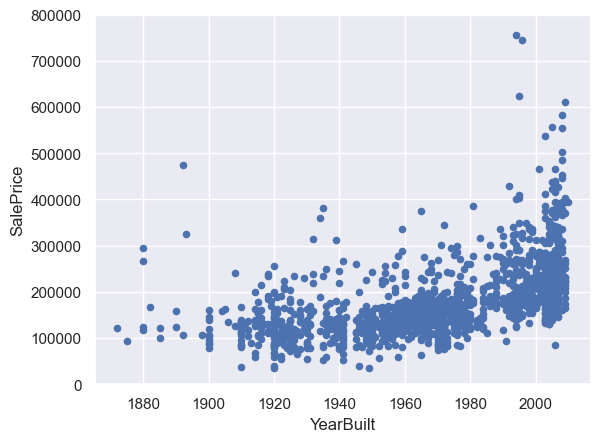

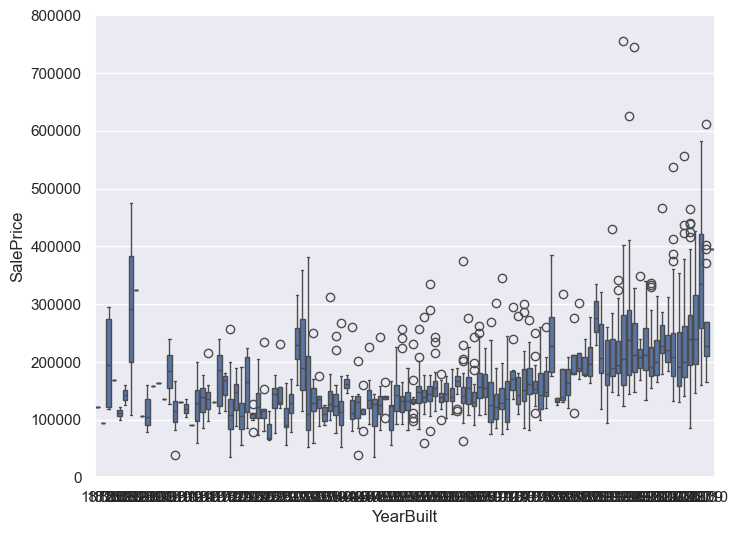

In [240]:
feature2 =  'YearBuilt'
data = pd.concat([train['SalePrice'],train[feature2]],axis=1)
data.plot.scatter(x=feature2, y='SalePrice',ylim=(0,800000));
fi,axis=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=feature2,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)


**Not more effective******

# summary

'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

**Correlation matrix (heatmap style)** 

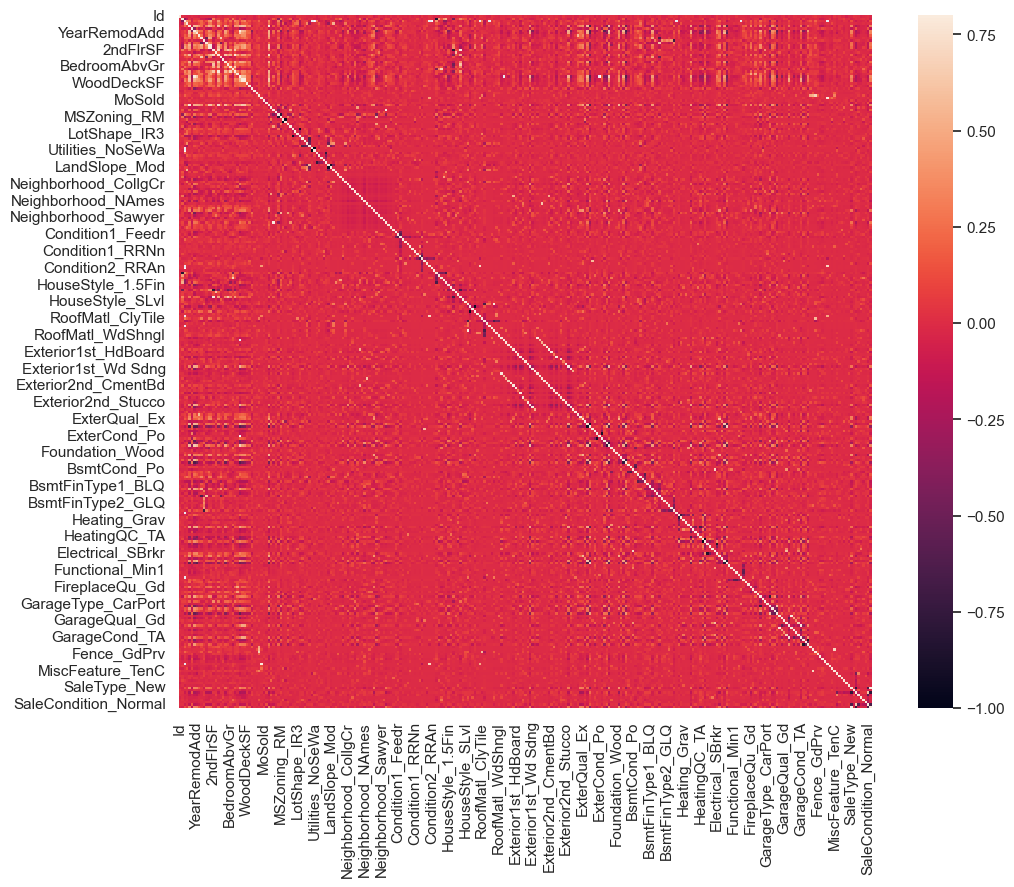

In [245]:
encoding=pd.get_dummies(train)
corr =   encoding.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);
# corr1=train.corr()
# f,ax=plt.subplots(figsize(12,9))
# sns.heatmap(corr1, vmax=.8, asquare=True)

because data with catagerical data you had to handle it 
by method1: encoding all data 
or method2: encoding feature with cata only 


In [247]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is called 'train'
for col in train.columns:
    try:
        # Try converting the column to numeric.  Errors if it's not possible.
        pd.to_numeric(train[col], errors='raise')  # errors='raise' makes it throw an exception
        print(f"Column '{col}' is numeric.")
    except (TypeError, ValueError):
        # If conversion fails, print the column name and investigate
        print(f"Column '{col}' is NOT numeric. Contains values like: {train[col].unique()}")

Column 'Id' is numeric.
Column 'MSSubClass' is numeric.
Column 'MSZoning' is NOT numeric. Contains values like: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Column 'LotFrontage' is numeric.
Column 'LotArea' is numeric.
Column 'Street' is NOT numeric. Contains values like: ['Pave' 'Grvl']
Column 'Alley' is NOT numeric. Contains values like: [nan 'Grvl' 'Pave']
Column 'LotShape' is NOT numeric. Contains values like: ['Reg' 'IR1' 'IR2' 'IR3']
Column 'LandContour' is NOT numeric. Contains values like: ['Lvl' 'Bnk' 'Low' 'HLS']
Column 'Utilities' is NOT numeric. Contains values like: ['AllPub' 'NoSeWa']
Column 'LotConfig' is NOT numeric. Contains values like: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Column 'LandSlope' is NOT numeric. Contains values like: ['Gtl' 'Mod' 'Sev']
Column 'Neighborhood' is NOT numeric. Contains values like: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gil

In [248]:
train1 = pd.get_dummies(train, columns=['MSZoning'], prefix='MSZoning')
train1 = pd.get_dummies(train, columns=['Street'], prefix='Street')
#complete

**zoomed heatmap**

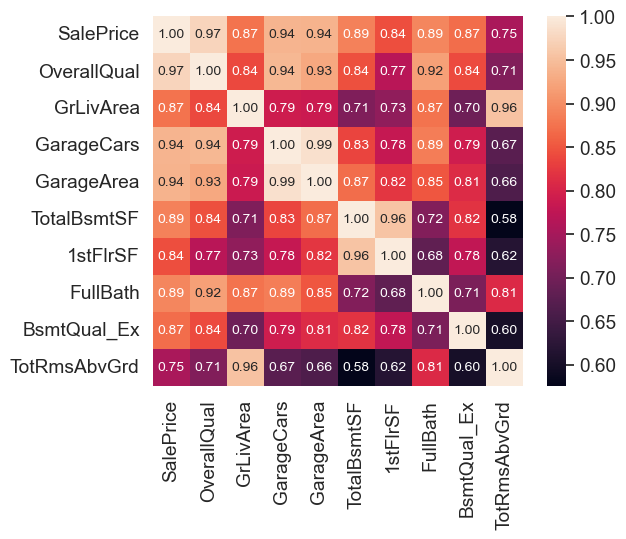

In [250]:
corr =   encoding.corr()
k = 10 #number of variables for heatmap high effiect
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef( corr[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

quality before heatmap we not interst with it but heatmap give it high importance

**Scatter plots between 'salePrice and correlated variables** 

In [253]:
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index

cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd'],
      dtype='object')

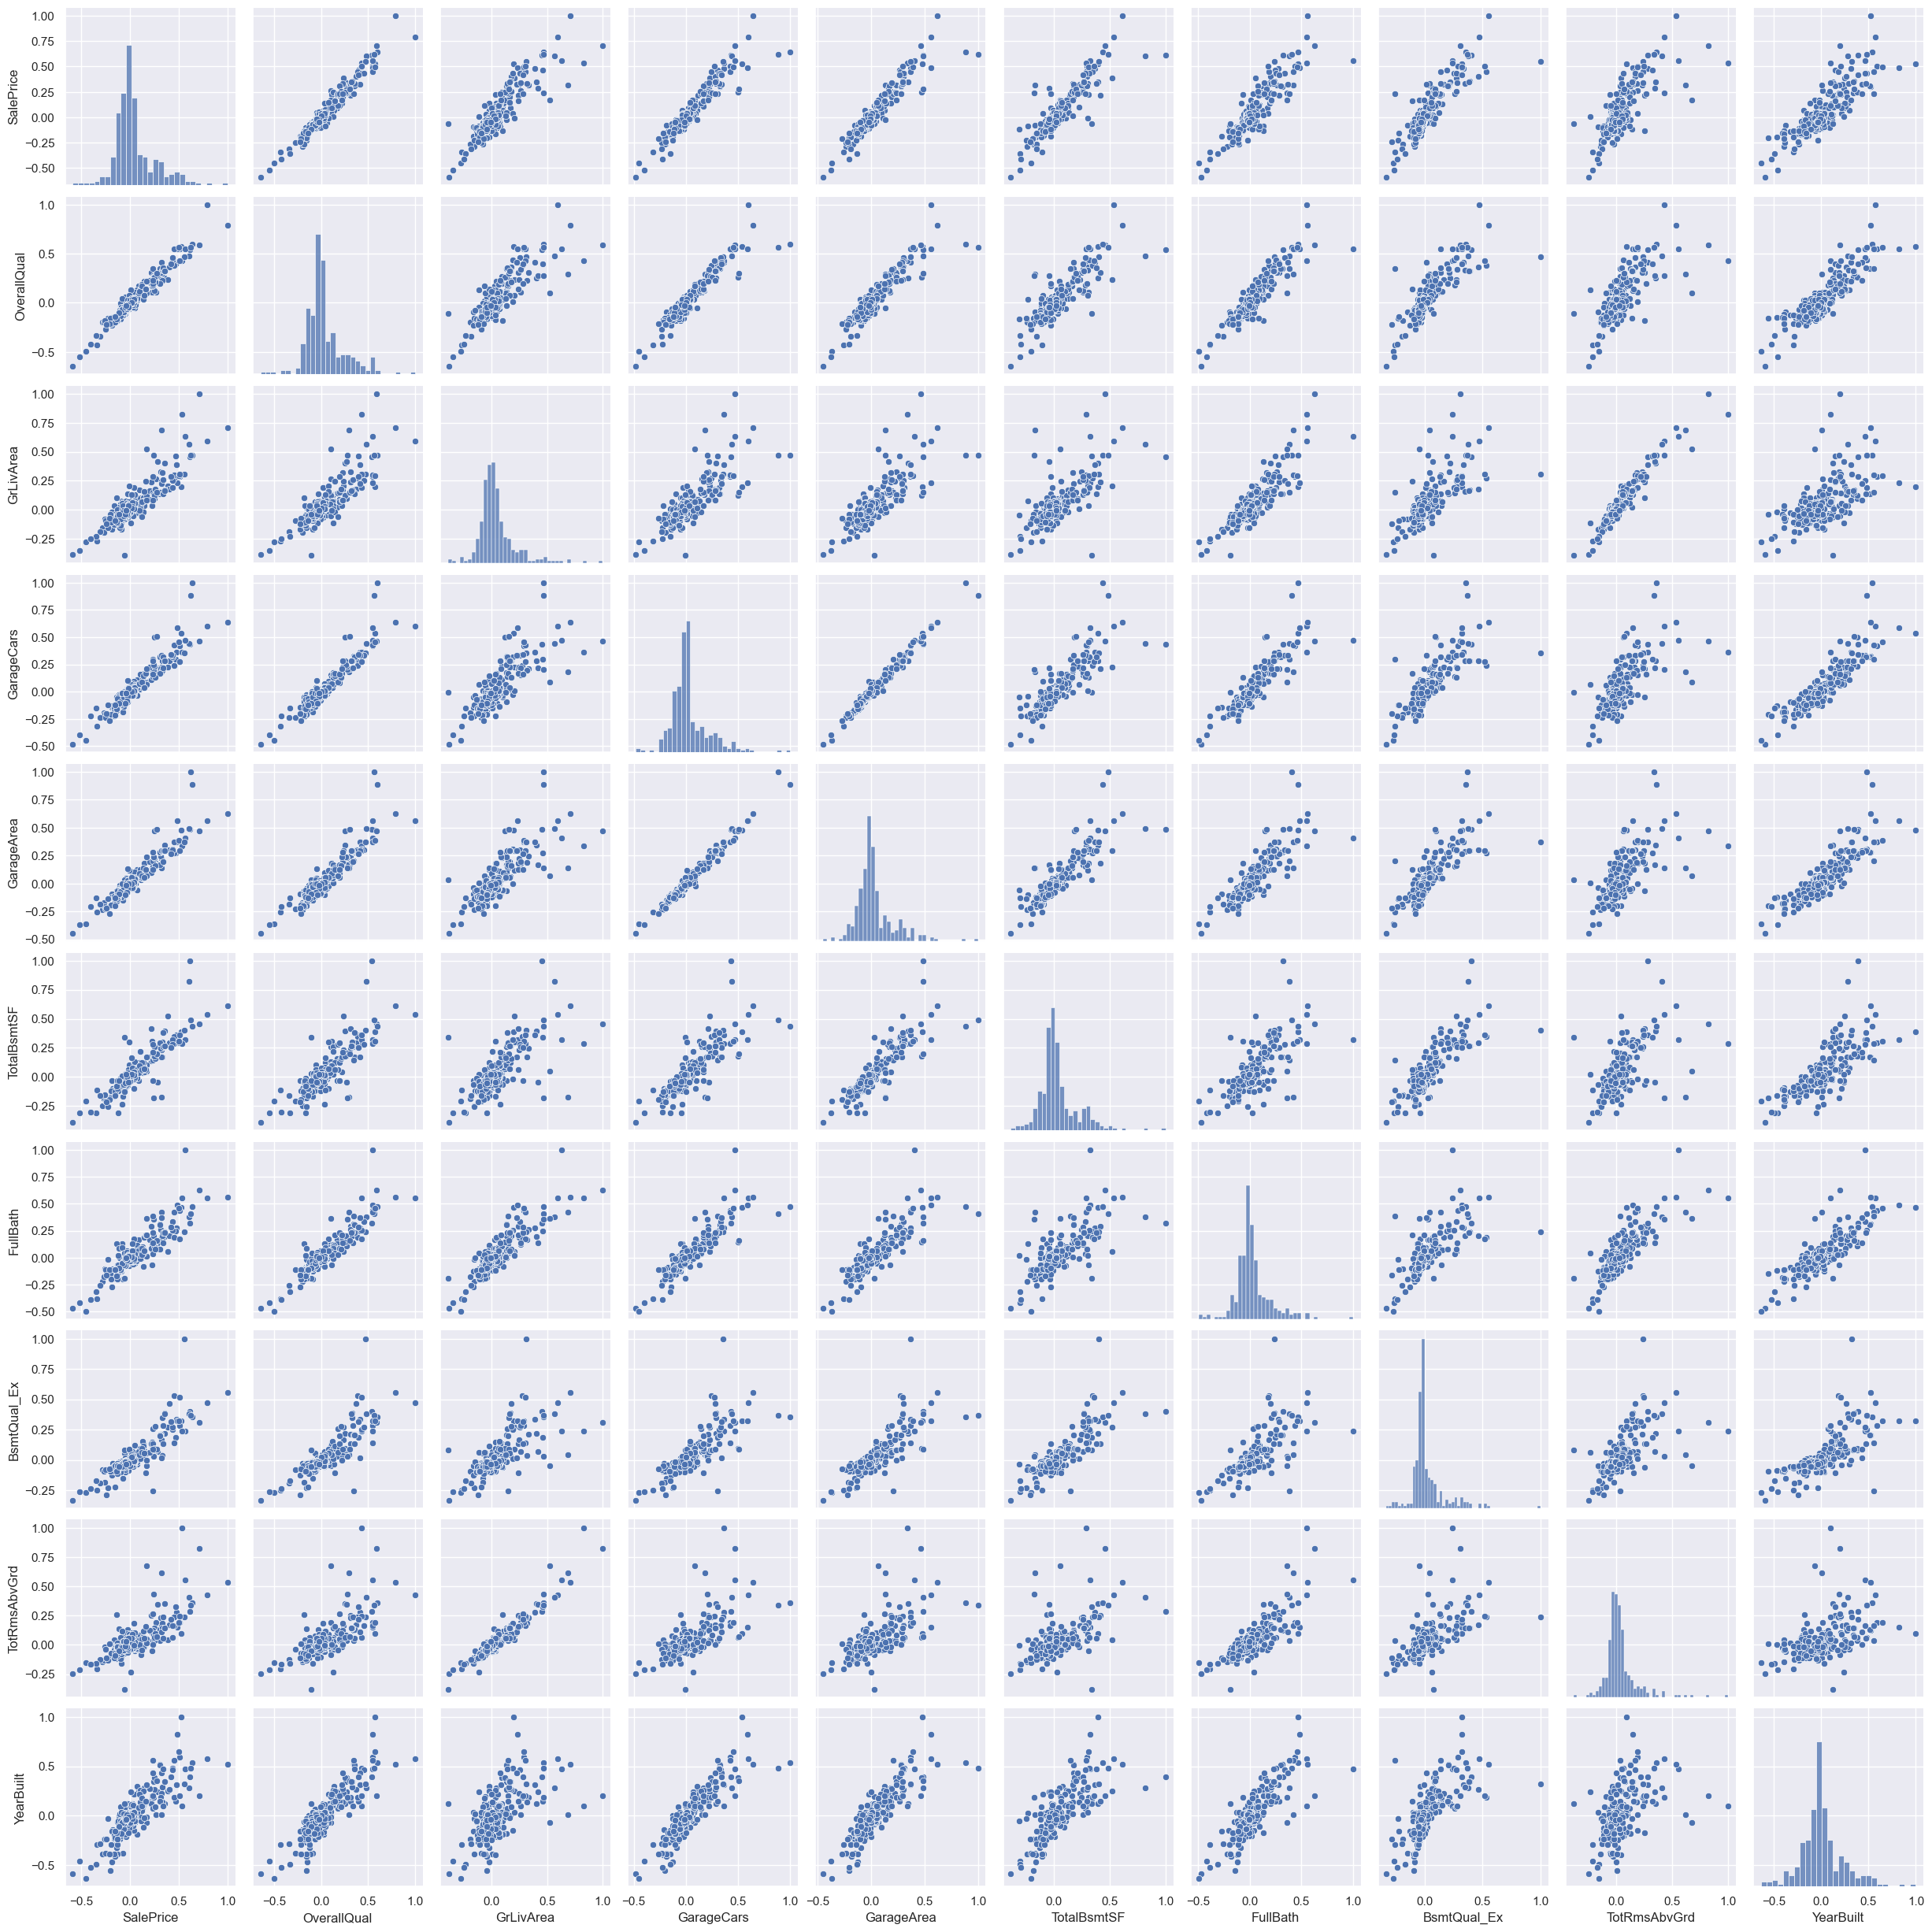

In [254]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF' , 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd','YearBuilt']
sns.pairplot(corr[cols],size=2.5)
plt.show()



1. **Relationship between SalePrice and OverallQual:**    Type of Relationship: A strong and clear positive   (direct) relationship.
2. **Impact of GrLivArea on SalePrice:**    Type of Relationship: Positive relationship.
3. **Impact of YearBuilt on SalePrice:**    Type of Relationship: Slight upward trend.

    

# Missing data

In [257]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missingData=pd.concat([total,percent],axis=1,keys=['Total','percent'])
missingData.head(20)

,Total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

 # Outliers

we'll standardize the data.

**Bivariate analysis**

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover. As Alan Kay said, 'a change in perspective is worth 80 IQ points'.

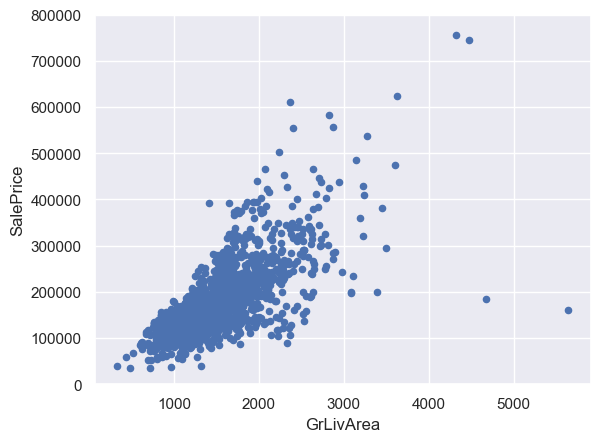

In [263]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [264]:
train.sort_values(by='GrLivArea',ascending = False)[:2]

train = train.drop(train[train['Id']==1299].index)
train = train.drop(train[ train['Id']== 524].index)



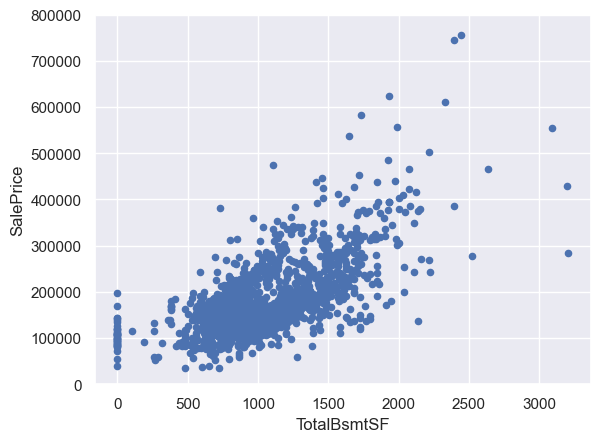

In [265]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We have 3 outlier but we I think that  don't effect because
These homes might be significantly different from the vast majority of houses in the dataset (e.g., much larger, custom-built, or having unique features). If your goal is to model the typical home sale price, including these outliers could skew your model and make it less accurate for predictions on most houses.

Data analysis

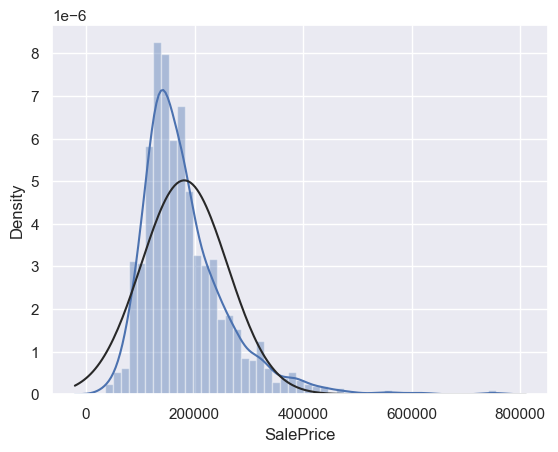

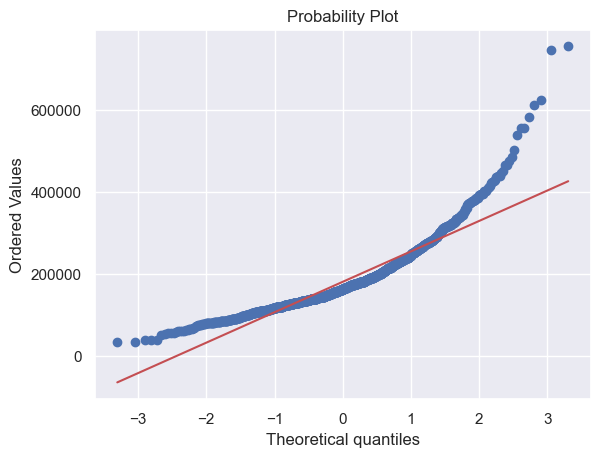

In [268]:
sns.distplot(train['SalePrice'],fit=norm)
fig= plt.figure()
result=stats.probplot(train['SalePrice'],plot=plt)

Because line not linear we can transform by take log

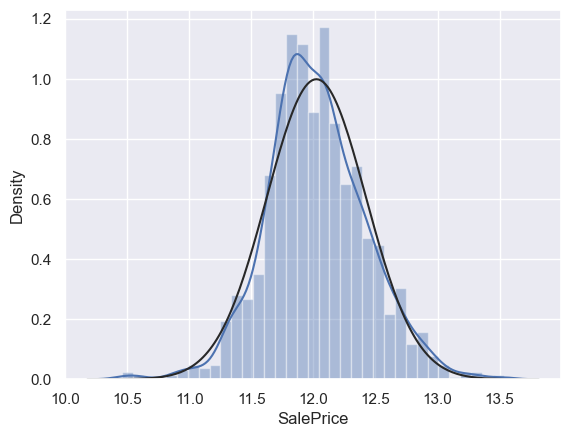

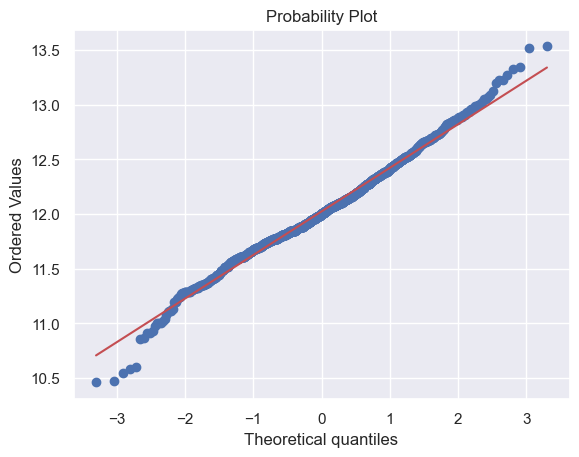

In [270]:
train['SalePrice']=np.log(train['SalePrice'])
sns.distplot( train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot( train['SalePrice'], plot=plt)

now become as linear 

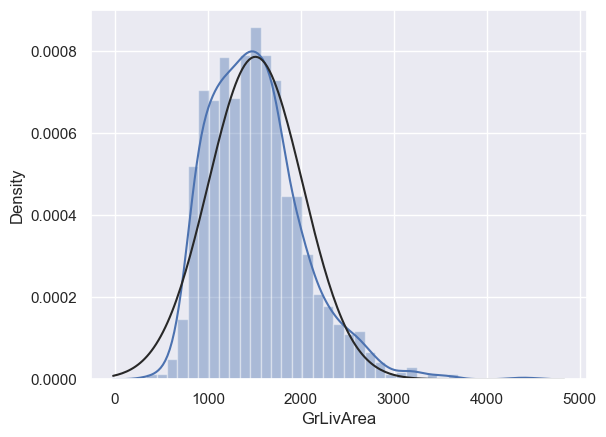

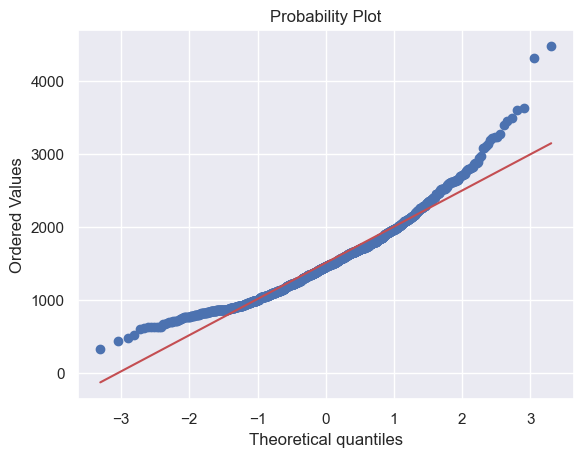

In [272]:
sns.distplot( train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot( train['GrLivArea'], plot=plt)

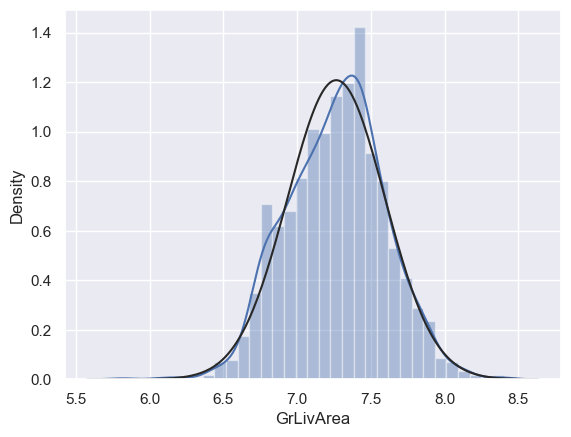

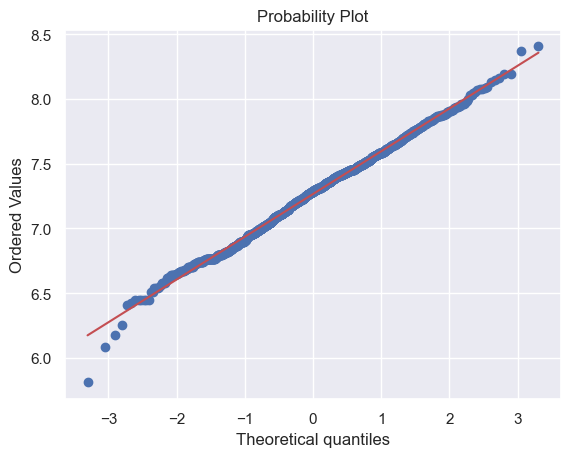

In [273]:
train['GrLivArea']=np.log(train['GrLivArea'])
sns.distplot( train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot( train['GrLivArea'], plot=plt)


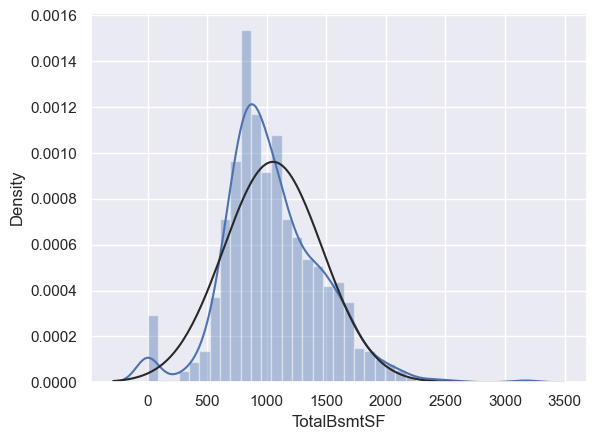

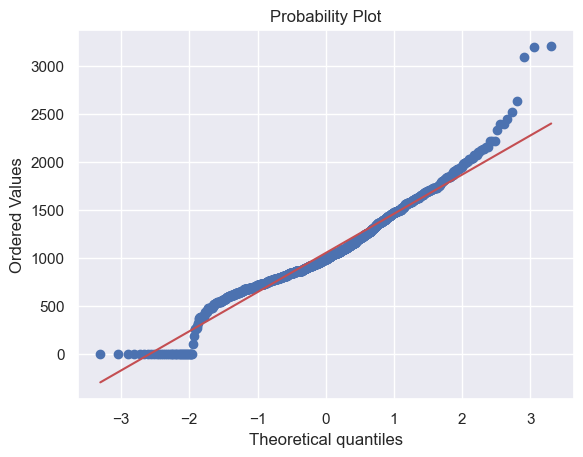

In [274]:
sns.distplot( train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot( train['TotalBsmtSF'], plot=plt)

Log transformations are often used to reduce skewness and make data closer to a normal distribution. However, you cannot take the logarithm of zero.  This is the core problem.

In [276]:
# we do technque convert binary by add one cloumn if area greater than >>1 else = 0
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1


In [277]:
train.loc[ train['HasBsmt']==1,'TotalBsmtSF'] = np.log ( train['TotalBsmtSF'])

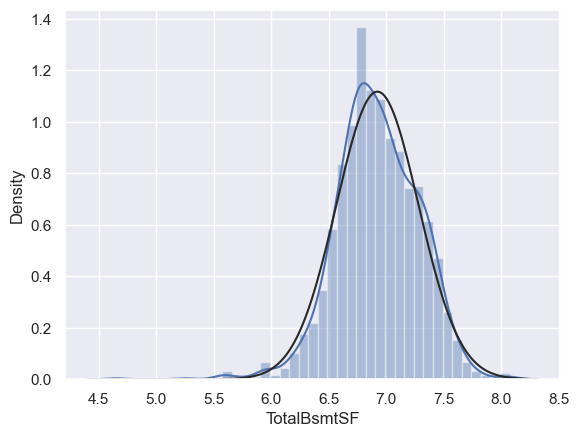

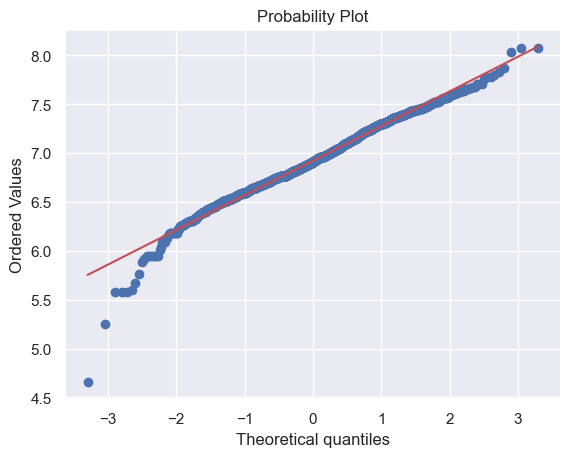

In [278]:
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

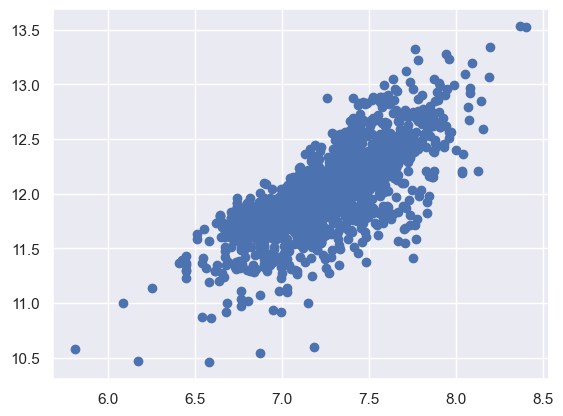

In [279]:
plt.scatter(train['GrLivArea'], train['SalePrice']);

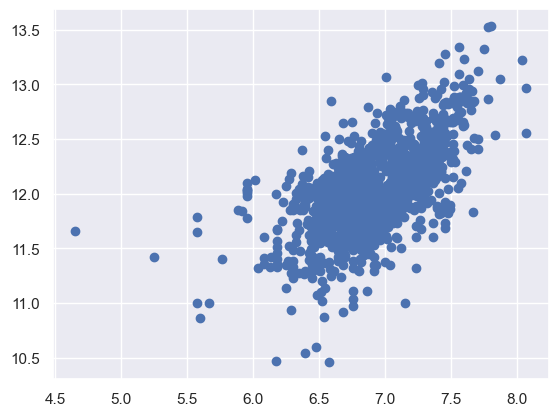

In [280]:
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice']);

In [281]:
train=pd.get_dummies(train)
train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


# Modeling 

In [283]:
feature=[ 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF' , 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd','YearBuilt']
x=train[feature]
y=train['SalePrice']


In [298]:
#after  salacted feature
algorithms_params = {
    "Linear Regression": {'algorithm': LinearRegression},  # No parameters to tune
    "Ridge Regression": {'algorithm': Ridge, 'param_grid': {'alpha': [0.1, 1.0, 10.0]}},
    "Lasso Regression": {'algorithm': Lasso, 'param_grid': {'alpha': [0.1, 1.0, 10.0]}},
    "Elastic Net": {'algorithm': ElasticNet, 'param_grid': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}},
    "Support Vector Regression": {'algorithm': SVR, 'param_grid': {'C': [0.1, 1.0, 10.0], 'kernel': ['rbf', 'linear']}},
    "Gradient Boosting": {'algorithm': GradientBoostingRegressor, 'param_grid': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}}
     }
 
def train_and_evaluate_regressors(X, y, algorithms_params, test_size=0.2, random_state=42):
    """
    Trains and evaluates multiple regression algorithms with parameter tuning using GridSearchCV.

    Args:
        X: Features (NumPy array or Pandas DataFrame).
        y: Target variable (NumPy array or Pandas Series).
        algorithms_params: A dictionary where keys are algorithm names and values are dictionaries of hyperparameters to tune.
        test_size: The proportion of the dataset to include in the test split.
        random_state: Controls the random number generation.

    Returns:
        A dictionary containing the trained models and evaluation metrics for each algorithm.
        The fitted scaler.
    """

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}

    for name, params in algorithms_params.items():
        print(f"Training and evaluating {name}...")

        algorithm = params['algorithm'] # Get the algorithm class
        param_grid = params.get('param_grid', {})  # Hyperparameters to tune, empty dict if none

        if param_grid: # If there are parameters to tune
            print("Performing Grid Search...")
            grid_search = GridSearchCV(algorithm(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) #Use negative MSE as score for GridSearchCV
            grid_search.fit(X_train_scaled, y_train)
            best_model = grid_search.best_estimator_
            print(f"Best parameters for {name}: {grid_search.best_params_}")
        else: # No hyperparameter tuning needed
            best_model = algorithm().fit(X_train_scaled, y_train) # Train directly if no parameter grid

        y_pred = best_model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            'model': best_model,
            'mse': mse,
            'rmse': rmse,
            'r2': r2,
            'y_pred': y_pred
        }
        print()

        print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R-squared: {r2:.4f}")

    return results, scaler


 

 
 


 

results, scaler = train_and_evaluate_regressors(x, y, algorithms_params)

# ... (rest of the code for accessing results, plotting, and saving the model remains the same)

best_algorithm = max(results, key=lambda k: results[k]['r2'])
best_model = results[best_algorithm]['model']

 

print(f"\nBest Model: {best_algorithm} " )



Training and evaluating Linear Regression...
Linear Regression - MSE: 0.0286, RMSE: 0.1692, R-squared: 0.8301
Training and evaluating Ridge Regression...
Performing Grid Search...
Best parameters for Ridge Regression: {'alpha': 1.0}
Ridge Regression - MSE: 0.0287, RMSE: 0.1693, R-squared: 0.8300
Training and evaluating Lasso Regression...
Performing Grid Search...
Best parameters for Lasso Regression: {'alpha': 0.1}
Lasso Regression - MSE: 0.0470, RMSE: 0.2167, R-squared: 0.7215
Training and evaluating Elastic Net...
Performing Grid Search...
Best parameters for Elastic Net: {'alpha': 0.1, 'l1_ratio': 0.1}
Elastic Net - MSE: 0.0299, RMSE: 0.1729, R-squared: 0.8226
Training and evaluating Support Vector Regression...
Performing Grid Search...
Best parameters for Support Vector Regression: {'C': 1.0, 'kernel': 'rbf'}
Support Vector Regression - MSE: 0.0331, RMSE: 0.1819, R-squared: 0.8038
Training and evaluating Gradient Boosting...
Performing Grid Search...
Best parameters for Gradient 